In [ ]:
import tensorflow as tf

In [ ]:
import torch as t
import numpy as np

In [ ]:
data = [[1,2], [3,4]]
x_data = t.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
np_array = np.array(data)
x_np = t.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
X_ones = t.ones_like(x_data)
print("Ones Tensor:\n",X_ones)


Ones Tensor:
 tensor([[1, 1],
        [1, 1]])


###Random Tensor

In [ ]:
X_rand = t.rand_like(x_data, dtype=t.float)
print("Random tensor:\n", X_rand)

Random tensor:
 tensor([[0.9506, 0.5638],
        [0.2077, 0.0830]])


###Attributes of a tensor

In [ ]:
tensor = t.rand(3,4)

print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

torch.Size([3, 4])
torch.float32
cpu


In [ ]:
if t.cuda.is_available():
  tensor = tensor.to("cuda")

print(t.device)

<class 'torch.device'>


In [ ]:
tensor = t.rand_like(x_data, dtype = t.float)
tensor

tensor([[0.0955, 0.7904],
        [0.4791, 0.3134]])

In [ ]:
print("first row", tensor[0])
print("Last column:", tensor[...,0])

first row tensor([0.0955, 0.7904])
Last column: tensor([0.0955, 0.4791])


In [ ]:
values = t.tensor([[1, 2, 3, 4],
                       [4, 5, 6, 7],
                       [7, 8, 9, 10]])

first_column = values[:, 0]

last_row = values[-1, :]

matrix_3x3 = values[:, :3]

print("First Column:")
print(first_column)

print("\nLast Row:")
print(last_row)

print("\n3x3 Matrix (First three columns):")
print(matrix_3x3)


First Column:
tensor([1, 4, 7])

Last Row:
tensor([ 7,  8,  9, 10])

3x3 Matrix (First three columns):
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [ ]:
matrix = t.tensor([[1,2,3,4],[4,5,6,7],[7,8,9,10]])
matrix

tensor([[ 1,  2,  3,  4],
        [ 4,  5,  6,  7],
        [ 7,  8,  9, 10]])

In [ ]:
concat = t.cat([x_data, x_data], dim=1)
concat

tensor([[1, 2, 1, 2],
        [3, 4, 3, 4]])

In [ ]:
concat = t.cat([x_data,x_data], dim=0)
concat

tensor([[1, 2],
        [3, 4],
        [1, 2],
        [3, 4]])

###Arithmetic operations


In [ ]:
x = t.tensor([1,2,3], dtype = t.float32)
y = t.tensor([4,5,6], dtype = t.float32)

In [ ]:
z = x+y
z

tensor([5., 7., 9.])

In [ ]:
q = x-y
q

tensor([-3., -3., -3.])

In [ ]:
exponent = t.exp(x)
exponent

tensor([ 2.7183,  7.3891, 20.0855])

In [ ]:
sqrt_x = t.sqrt(x)
sqrt_y = t.sqrt(y)
print(sqrt_x)
print(sqrt_y)

tensor([1.0000, 1.4142, 1.7321])
tensor([2.0000, 2.2361, 2.4495])


In [ ]:
sin_x = t.sin(x)
sin_y = t.sin(y)
print(sin_x)
print(sin_y)


tensor([0.8415, 0.9093, 0.1411])
tensor([-0.7568, -0.9589, -0.2794])


###Matrix multiplication

In [ ]:
matrix_A = t.tensor([[1,2],[3,4]], dtype=t.float32)
matrix_B = t.tensor([[5,6],[7,8]], dtype=t.float32)

result = t.matmul(matrix_A, matrix_B)
result

tensor([[19., 22.],
        [43., 50.]])

Eigen values and eigen vectors

In [ ]:
import torch

matrix = torch.tensor([[1.0, 2.0, 3.0],
                       [4.0, 5.0, 6.0],
                       [7.0, 8.0, 10.0]])

determinant = torch.det(matrix)

transpose_matrix = torch.t(matrix)

inverse_matrix = torch.inverse(matrix)

print("Original Matrix:")
print(matrix)

print("\nDeterminant of the Matrix:")
print(determinant)

print("\nTranspose of the Matrix:")
print(transpose_matrix)

print("\nInverse of the Matrix:")
print(inverse_matrix)


Original Matrix:
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8., 10.]])

Determinant of the Matrix:
tensor(-3.0000)

Transpose of the Matrix:
tensor([[ 1.,  4.,  7.],
        [ 2.,  5.,  8.],
        [ 3.,  6., 10.]])

Inverse of the Matrix:
tensor([[-0.6667, -1.3333,  1.0000],
        [-0.6667,  3.6667, -2.0000],
        [ 1.0000, -2.0000,  1.0000]])


In [ ]:
eigenvalues, eigenvectors = t.linalg.eig(matrix_A)
print("Eigen values:\n", eigenvalues)
print("Eigen vectors:\n", eigenvectors)

Eigen values:
 tensor([-0.3723+0.j,  5.3723+0.j])
Eigen vectors:
 tensor([[-0.8246+0.j, -0.4160+0.j],
        [ 0.5658+0.j, -0.9094+0.j]])


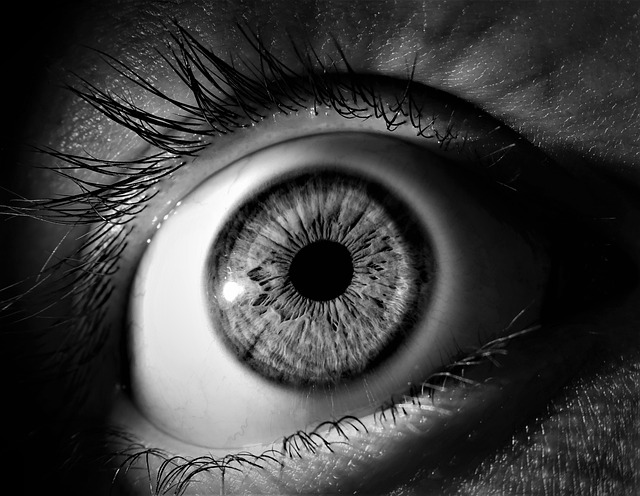

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch

image_path = '/content/image123.jpg'

img = Image.open(image_path)

display(img)

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

tensor_image = transform(img)

print("Tensor shape:", tensor_image.shape)

Tensor shape: torch.Size([3, 496, 640])


(-0.5, 639.5, 495.5, -0.5)

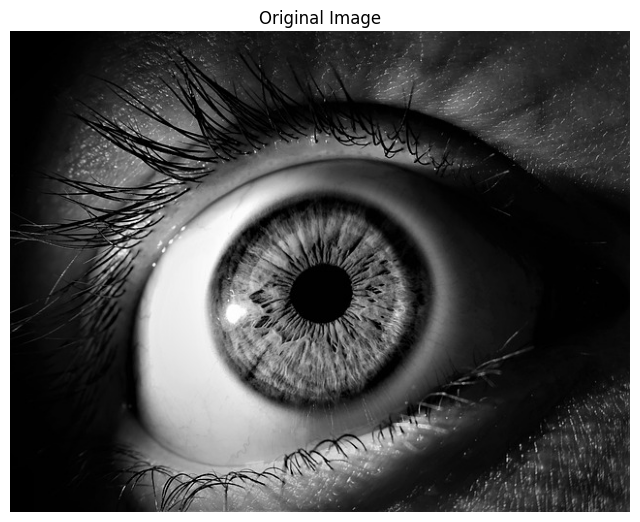

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

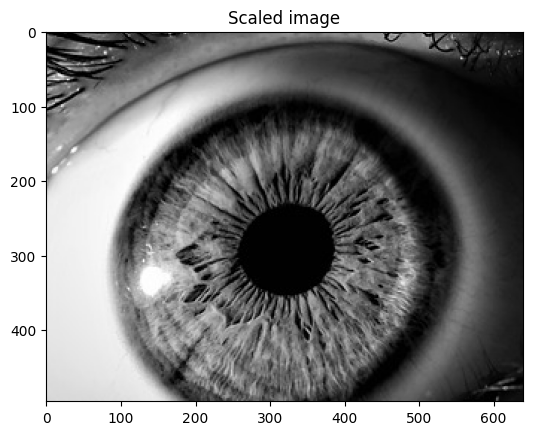

In [ ]:
import torchvision.transforms.functional as F

#Scaling transformation matrix
scaling_factor = 2
#Applying scaling
scaled_image = F.affine(tensor_image, angle=0,
                         translate=[0,0], scale=scaling_factor,shear=[0,0])

#Displaying the scaled image
plt.subplot(1,1,1)
plt.title("Scaled image")
plt.imshow(F.to_pil_image(scaled_image))

In [ ]:
# Identity matrix

import torch

identity_mat = torch.eye(2,3)
identity_mat

tensor([[1., 0., 0.],
        [0., 1., 0.]])

In [ ]:
#Flipping a 2D matrix using @
x = torch.tensor(([1,2,3],[4,5,6],[7,8,9]),dtype=t.float)
flip_matrix = torch.flip(torch.eye(x.shape[1]),dims=[0])
flip_matrix

tensor([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]])

In [ ]:
flipped_matrix = x @ flip_matrix
flipped_matrix

tensor([[3., 2., 1.],
        [6., 5., 4.],
        [9., 8., 7.]])

In [ ]:
scaled_image.shape

torch.Size([3, 496, 640])

In [ ]:
tensor_image.shape

torch.Size([3, 496, 640])

In [ ]:
tensor_image[2]

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1451, 0.1412, 0.1373],
        [0.0000, 0.0000, 0.0000,  ..., 0.1294, 0.1294, 0.1255],
        [0.0000, 0.0000, 0.0000,  ..., 0.1216, 0.1255, 0.1294],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.2510, 0.2627, 0.2627],
        [0.0000, 0.0000, 0.0000,  ..., 0.2235, 0.2471, 0.2471],
        [0.0000, 0.0000, 0.0000,  ..., 0.2196, 0.2392, 0.2314]])

In [ ]:
#Flipping the image
horizontal_flip_image = torch.flip(torch.eye(tensor_image.shape[2]),dims=[0])
horizontal_flip_image

horizontally_flipped_image = tensor_image @ horizontal_flip_image
horizontally_flipped_image

tensor([[[0.1373, 0.1412, 0.1451,  ..., 0.0000, 0.0000, 0.0000],
         [0.1255, 0.1294, 0.1294,  ..., 0.0000, 0.0000, 0.0000],
         [0.1294, 0.1255, 0.1216,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.2627, 0.2627, 0.2510,  ..., 0.0000, 0.0000, 0.0000],
         [0.2471, 0.2471, 0.2235,  ..., 0.0000, 0.0000, 0.0000],
         [0.2314, 0.2392, 0.2196,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.1373, 0.1412, 0.1451,  ..., 0.0000, 0.0000, 0.0000],
         [0.1255, 0.1294, 0.1294,  ..., 0.0000, 0.0000, 0.0000],
         [0.1294, 0.1255, 0.1216,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.2627, 0.2627, 0.2510,  ..., 0.0000, 0.0000, 0.0000],
         [0.2471, 0.2471, 0.2235,  ..., 0.0000, 0.0000, 0.0000],
         [0.2314, 0.2392, 0.2196,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.1373, 0.1412, 0.1451,  ..., 0.0000, 0.0000, 0.0000],
         [0.1255, 0.1294, 0.1294,  ..., 0.0000, 0.0000, 0.0000],
         [0.1294, 0.1255, 0.1216,  ..., 0.0000, 0.0000, 0.

In [ ]:
tensor_image.shape

torch.Size([3, 496, 640])

In [ ]:
new_image = tensor_image[0,0:496,0:496]
new_image.shape

torch.Size([496, 496])

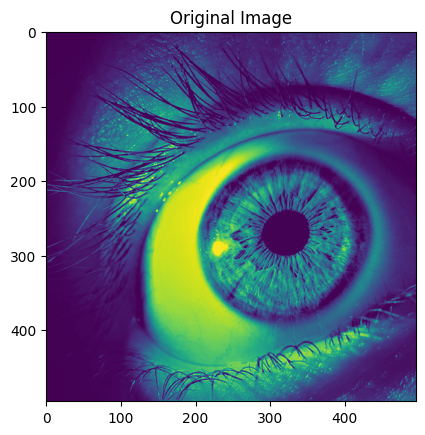

In [ ]:
plt.subplot(1,1,1)
plt.title("Original Image")
plt.imshow(F.to_pil_image(new_image))

In [ ]:
vertically_flip_image = torch.flip(torch.eye(new_image.shape[0]),dims=[1])
vertically_flip_image

vertically_flipped_image = new_image @ vertically_flip_image
vertically_flipped_image

tensor([[0.1294, 0.1333, 0.1412,  ..., 0.0000, 0.0000, 0.0000],
        [0.1216, 0.1137, 0.1137,  ..., 0.0000, 0.0000, 0.0000],
        [0.1176, 0.1098, 0.1059,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.3490, 0.3020, 0.2510,  ..., 0.0000, 0.0000, 0.0000],
        [0.4235, 0.3451, 0.3255,  ..., 0.0000, 0.0000, 0.0000],
        [0.4235, 0.3843, 0.3922,  ..., 0.0000, 0.0000, 0.0000]])

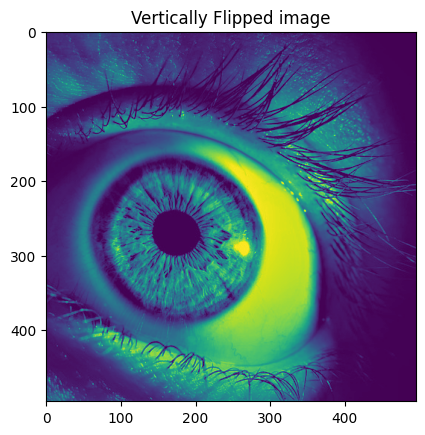

In [ ]:
plt.subplot(1,1,1)
plt.title("Vertically Flipped image")
plt.imshow(F.to_pil_image(vertically_flipped_image))

In [ ]:
horizontally_flip_image = torch.flip(torch.eye(new_image.shape[1]),dims=[0])
horizontally_flip_image

horizontally_flipped_image = horizontally_flip_image @ new_image
horizontally_flipped_image

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.3922, 0.3843, 0.4235],
        [0.0000, 0.0000, 0.0000,  ..., 0.3255, 0.3451, 0.4235],
        [0.0000, 0.0000, 0.0000,  ..., 0.2510, 0.3020, 0.3490],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.1059, 0.1098, 0.1176],
        [0.0000, 0.0000, 0.0000,  ..., 0.1137, 0.1137, 0.1216],
        [0.0000, 0.0000, 0.0000,  ..., 0.1412, 0.1333, 0.1294]])

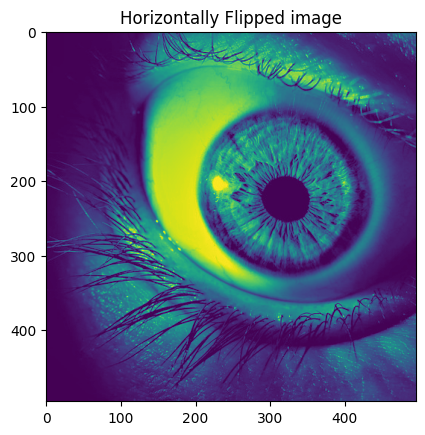

In [ ]:
plt.subplot(1,1,1)
plt.title("Horizontally Flipped image")
plt.imshow(F.to_pil_image(horizontally_flipped_image))

In [ ]:
horizontally_flipped_image[0].shape
hori_flipped = horizontally_flipped_image[0]
hori_flipped.ndim
hori_flipped.dtype

hori_flipped @ flip_matrix
# hori_flipped_image = tensor_image @ hori_flipped
# hori_flipped_image

RuntimeError: mat1 and mat2 shapes cannot be multiplied (496x640 and 3x3)

In [ ]:
vertically_flip_image = torch.flip(torch.eye(tensor_image.shape[2]),dims=[1])
vertically_flip_image

vertically_flipped_image = tensor_image @ vertically_flip_image
vertically_flipped_image

tensor([[[0.1373, 0.1412, 0.1451,  ..., 0.0000, 0.0000, 0.0000],
         [0.1255, 0.1294, 0.1294,  ..., 0.0000, 0.0000, 0.0000],
         [0.1294, 0.1255, 0.1216,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.2627, 0.2627, 0.2510,  ..., 0.0000, 0.0000, 0.0000],
         [0.2471, 0.2471, 0.2235,  ..., 0.0000, 0.0000, 0.0000],
         [0.2314, 0.2392, 0.2196,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.1373, 0.1412, 0.1451,  ..., 0.0000, 0.0000, 0.0000],
         [0.1255, 0.1294, 0.1294,  ..., 0.0000, 0.0000, 0.0000],
         [0.1294, 0.1255, 0.1216,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.2627, 0.2627, 0.2510,  ..., 0.0000, 0.0000, 0.0000],
         [0.2471, 0.2471, 0.2235,  ..., 0.0000, 0.0000, 0.0000],
         [0.2314, 0.2392, 0.2196,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.1373, 0.1412, 0.1451,  ..., 0.0000, 0.0000, 0.0000],
         [0.1255, 0.1294, 0.1294,  ..., 0.0000, 0.0000, 0.0000],
         [0.1294, 0.1255, 0.1216,  ..., 0.0000, 0.0000, 0.

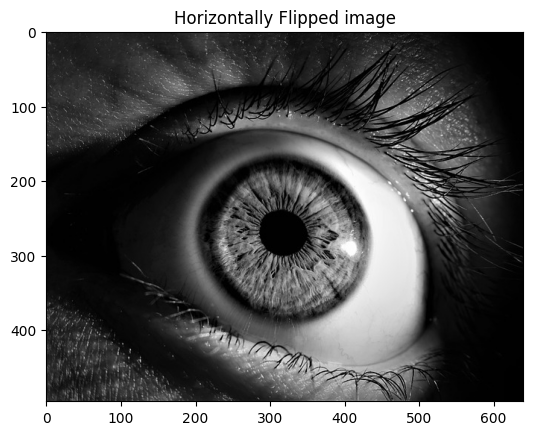

In [ ]:
plt.subplot(1,1,1)
plt.title("Horizontally Flipped image")
plt.imshow(F.to_pil_image(horizontally_flipped_image))

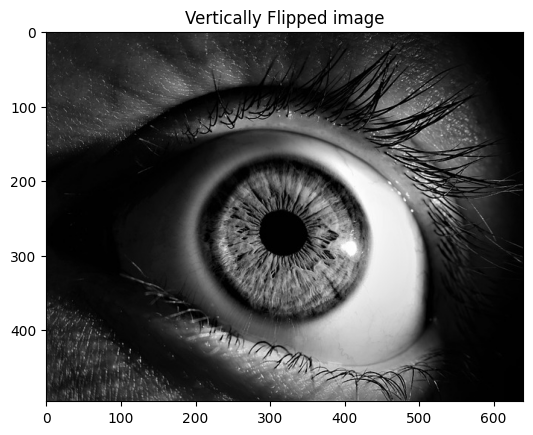

In [ ]:
plt.subplot(1,1,1)
plt.title("Vertically Flipped image")
plt.imshow(F.to_pil_image(vertically_flipped_image))